In [ ]:
!nvidia-smi

Wed Jun  1 23:13:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Install libraries

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 28.4 MB/s 
     |████████████████████████████████| 6.6 MB 47.4 MB/s 
     |████████████████████████████████| 596 kB 70.8 MB/s 
     |████████████████████████████████| 86 kB 8.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install datasets

#Download XNLI dataset

In [ ]:
from datasets import load_dataset
import pandas as pd
from tqdm.auto import tqdm
import os

In [ ]:
vi_dataset = load_dataset("xnli",language='vi')
en_dataset = load_dataset("xnli",language='en')

In [ ]:
vi_dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})

In [ ]:
en_dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})

In [ ]:
vi_train=pd.DataFrame(vi_dataset['train'])
vi_valid=pd.DataFrame(vi_dataset['validation'])
vi_test=pd.DataFrame(vi_dataset['test'])

In [ ]:
en_train=pd.DataFrame(en_dataset['train'])
en_valid=pd.DataFrame(en_dataset['validation'])
en_test=pd.DataFrame(en_dataset['test'])

Concatenate two datasets



In [ ]:
def merge_en_vi_pairs(en,vi):
  # en set, vi set set must have the same size

  en_premises=en['premise']
  en_hypothesises=en['hypothesis']
  en_labels=en['label']

  vi_premises=vi['premise']
  vi_hypothesises=vi['hypothesis']
  vi_labels=vi['label']

  pairs=[]
  num_samples=len(en)
  bar=tqdm(range(num_samples))

  for i in range(num_samples):
    if en_labels[i]==vi_labels[i]:
      pairs.append({
          'en_premise':en_premises[i],
          'vi_premise':vi_premises[i],
          'en_hypothesis':en_hypothesises[i],
          'vi_hypothesis':vi_hypothesises[i],
          'label':en_labels[i],
      })
    bar.update()
  
  return pd.DataFrame(pairs)

In [ ]:
train=merge_en_vi_pairs(en_train,vi_train)


  0%|          | 0/392702 [00:00<?, ?it/s]

In [ ]:
train

,en_premise,vi_premise,en_hypothesis,vi_hypothesis,label
0,Conceptually cream skimming has two basic dime...,Conceptually kem skimming có hai kích thước cơ...,Product and geography are what make cream skim...,Sản phẩm và địa lý là những gì làm cho kem ski...,1
1,you know during the season and i guess at at y...,Bạn biết trong mùa giải và tôi đoán ở mức độ c...,You lose the things to the following level if ...,Anh sẽ mất mọi thứ ở mức độ sau nếu người dân ...,0
2,One of our number will carry out your instruct...,Một trong số chúng tôi sẽ thực hiện các hướng ...,A member of my team will execute your orders w...,Một thành viên trong đội của tôi sẽ thực hiện ...,0
3,How do you know ? All this is their informatio...,Làm sao anh biết ? Tất cả đây là thông tin của...,This information belongs to them .,Thông tin này thuộc về họ .,0
4,yeah i tell you what though if you go price so...,Tôi nói cho anh biết nếu anh đi giá một số đôi...,The tennis shoes have a range of prices .,Đôi giày tennis có một tầm giá .,1
...,...,...,...,...,...
392697,"Clearly , California can - and must - do better .","Rõ ràng , California có thể - và phải - làm tố...",California cannot do any better .,California không thể làm được gì tốt hơn .,2
392698,It was once regarded as the most beautiful str...,Đó là một lần được đánh dấu là con đường đẹp n...,So many of the original buildings had been rep...,Rất nhiều các tòa nhà gốc đã được thay thế bởi...,1
392699,Houseboats are a beautifully preserved traditi...,Houseboats là một truyền thống được bảo tồn tu...,The tradition of houseboats originated while t...,Truyền thống của houseboats có nguồn gốc trong...,0
392700,Obituaries fondly recalled his on-air debates ...,Cáo phó thú vị đã ghi lại cuộc tranh luận trên...,The obituaries were beautiful and written in k...,Các cáo phó rất đẹp và được viết về những thàn...,1


In [ ]:
valid=merge_en_vi_pairs(en_valid,vi_valid)
test=merge_en_vi_pairs(en_test,vi_test)

  0%|          | 0/2490 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

In [ ]:
raw_dataset_directory='/content/drive/MyDrive/en-vi-nli/raw_dataset'
os.makedirs(raw_dataset_directory,exist_ok=True)

In [ ]:
train.to_csv(f'{raw_dataset_directory}/train.csv',index=False)
valid.to_csv(f'{raw_dataset_directory}/valid.csv',index=False)
test.to_csv(f'{raw_dataset_directory}/test.csv',index=False)

#Create cross linguistic sentences pairs dataset

In [ ]:
import pandas as pd

In [ ]:
raw_dataset_directory='/content/drive/MyDrive/en-vi-nli/raw_dataset'

In [ ]:
train=pd.read_csv(f'{raw_dataset_directory}/train.csv')
valid=pd.read_csv(f'{raw_dataset_directory}/valid.csv')
test=pd.read_csv(f'{raw_dataset_directory}/test.csv')

In [ ]:
train.value_counts(['label'])

label
2        130903
1        130900
0        130899
dtype: int64

In [ ]:
valid.value_counts(['label'])

label
0        830
1        830
2        830
dtype: int64

In [ ]:
test.value_counts(['label'])

label
0        1670
1        1670
2        1670
dtype: int64

suppose to generate dataset with the following column

- premise_language
- hypothesis_language
- premise_sentence
- hypothesis_sentence
- label

So, the final dataset will contains
- en-vi pairs
- vi-en pairs (not yet)
- en-en pairs (not yet)
- vi-vi pairs 

In [ ]:
pairs_type=[
  ['en','vi'],['vi','vi']
]

In [ ]:
def create_sentences_pairs_dataset(df):
  pairs=[]
  for idx,i in enumerate(pairs_type):
    
    premise_language=f'{i[0]}_premise'
    hypothesis_language=f'{i[1]}_hypothesis'
    print(premise_language,hypothesis_language)

    pair=df[[premise_language,hypothesis_language,'label']]
    pair['premise_language']=[i[0]]*len(df)
    pair['hypothesis_language']=[i[1]]*len(df)
    pair.rename(columns={premise_language:'premise',hypothesis_language:'hypothesis'},inplace=True)  
    pairs.append(pair)
  return pairs

In [ ]:
pairs=create_sentences_pairs_dataset(train)

en_premise vi_hypothesis
vi_premise vi_hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
pairs_dataset_directory='/content/drive/MyDrive/en-vi-nli/pairs_dataset'
os.makedirs(pairs_dataset_directory,exist_ok=True)

In [ ]:
def save_pairs_dataset(pairs,pairs_dataset_directory,data_type='train'):
  data_type_directory=f'/content/drive/MyDrive/en-vi-nli/pairs_dataset/{data_type}'
  os.makedirs(data_type_directory,exist_ok=True)
  for idx,pair in enumerate(pairs):
    pair.to_csv(f'{data_type_directory}/{pairs_type[idx][0]}_{pairs_type[idx][1]}.csv',index=False)

In [ ]:
save_pairs_dataset(pairs,pairs_dataset_directory,data_type='train')

In [ ]:
valid_pairs=create_sentences_pairs_dataset(valid)
test_pairs=create_sentences_pairs_dataset(test)

en_premise vi_hypothesis
vi_premise vi_hypothesis
en_premise vi_hypothesis
vi_premise vi_hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
save_pairs_dataset(valid_pairs,pairs_dataset_directory,data_type='valid')
save_pairs_dataset(test_pairs,pairs_dataset_directory,data_type='test')

# Preprocessing

In [ ]:
import pandas as pd
import string
import re
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

In [ ]:
pairs_dataset_directory='/content/drive/MyDrive/en-vi-nli/pairs_dataset'

In [ ]:
en_vi_train=pd.read_csv(f'{pairs_dataset_directory}/train/en_vi.csv')
vi_vi_train=pd.read_csv(f'{pairs_dataset_directory}/train/vi_vi.csv')

In [ ]:
en_vi_valid=pd.read_csv(f'{pairs_dataset_directory}/valid/en_vi.csv')
vi_vi_valid=pd.read_csv(f'{pairs_dataset_directory}/valid/vi_vi.csv')

In [ ]:
punctuations=list(string.punctuation)

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
def normalizer(s,lang='en'):

  def remove_meaningless_token(s):
    return re.sub(r'\b(jeez|yeah|hum|huh|oh)\b',' ',s)

  def remove_articles(text,language):
    if language=='en':
      regex = re.compile(r'\b(a|an|the)\b', re.UNICODE)
      return re.sub(regex, ' ', text)
    return text

  def white_space_fix(text):
    return ' '.join(text.split())

  def remove_punc(text):
    # exclude = set(string.punctuation)
    # return ''.join(ch for ch in text if ch not in exclude)
    chs=[]
    for ch in text:
      if ch not in punctuations:
        chs.append(ch)
      else:
        chs.append(" ")
    return "".join(chs)

  def lower(text):
    return text.lower()

  def remove_continuous_duplications(text):
    # if language !='en':
    #   return text

    if text.strip()=="":
      return text
    
    return re.sub(r'(.+\s)\1+',r'\1',text.strip()+' ')

  def replace_contractions(text,language='en'):
    if language=='en':
      for k,v in contraction_mapping.items():
        k=re.sub(r'\''," '",k)
        text=text.replace(k,v)
      return text
    return text
  
  _s=lower(s)
  _s=replace_contractions(_s,lang)
  _s=remove_continuous_duplications(_s)
  _s=remove_punc(_s)
  _s=remove_articles(_s,lang)
  _s=remove_meaningless_token(_s)
  return white_space_fix(_s).strip()

In [ ]:
def multiple_normalizer(df):
  num_samples=len(df)
  premises=[]
  hypothesises=[]
  bar=tqdm(range(num_samples))
  for i in range(num_samples):
    row=df.iloc[i]
    norm_premise=normalizer(row['premise'],row['premise_language'])
    norm_hypothesis=normalizer(row['hypothesis'],row['hypothesis_language'])
    premises.append(norm_premise)
    hypothesises.append(norm_hypothesis)
    bar.update()
  return premises,hypothesises

In [ ]:
premsises,hypothesises=multiple_normalizer(en_vi_train)
en_vi_train['norm_premise']=premsises
en_vi_train['norm_hypothesis']=hypothesises

  0%|          | 0/392702 [00:00<?, ?it/s]

In [ ]:
premsises,hypothesises=multiple_normalizer(en_vi_valid)
en_vi_valid['norm_premise']=premsises
en_vi_valid['norm_hypothesis']=hypothesises

  0%|          | 0/2490 [00:00<?, ?it/s]

In [ ]:
premsises,hypothesises=multiple_normalizer(vi_vi_valid)
vi_vi_valid['norm_premise']=premsises
vi_vi_valid['norm_hypothesis']=hypothesises

  0%|          | 0/2490 [00:00<?, ?it/s]

In [ ]:
premsises,hypothesises=multiple_normalizer(vi_vi_train)
vi_vi_train['norm_premise']=premsises
vi_vi_train['norm_hypothesis']=hypothesises

  0%|          | 0/392702 [00:00<?, ?it/s]

In [ ]:
tokenizer=AutoTokenizer.from_pretrained('xlm-roberta-base')

In [ ]:
def get_seq_length(s):
  toks=tokenizer.tokenize(s)
  return len(toks)

In [ ]:
en_vi_train['norm_premise_length']=en_vi_train['norm_premise'].map(get_seq_length)
en_vi_train['norm_hypothesis_length']=en_vi_train['norm_hypothesis'].map(get_seq_length)
en_vi_train['total_length']=en_vi_train['norm_premise_length']+en_vi_train['norm_hypothesis_length']

In [ ]:
vi_vi_train['norm_premise_length']=vi_vi_train['norm_premise'].map(get_seq_length)
vi_vi_train['norm_hypothesis_length']=vi_vi_train['norm_hypothesis'].map(get_seq_length)
vi_vi_train['total_length']=vi_vi_train['norm_premise_length']+vi_vi_train['norm_hypothesis_length']

In [ ]:
def seq_len_visualizer(x,y):
  fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(20,20))
  ax.bar(x,y)
  fig.show()

Visualize en-vi premise length distribution


(None, 382)

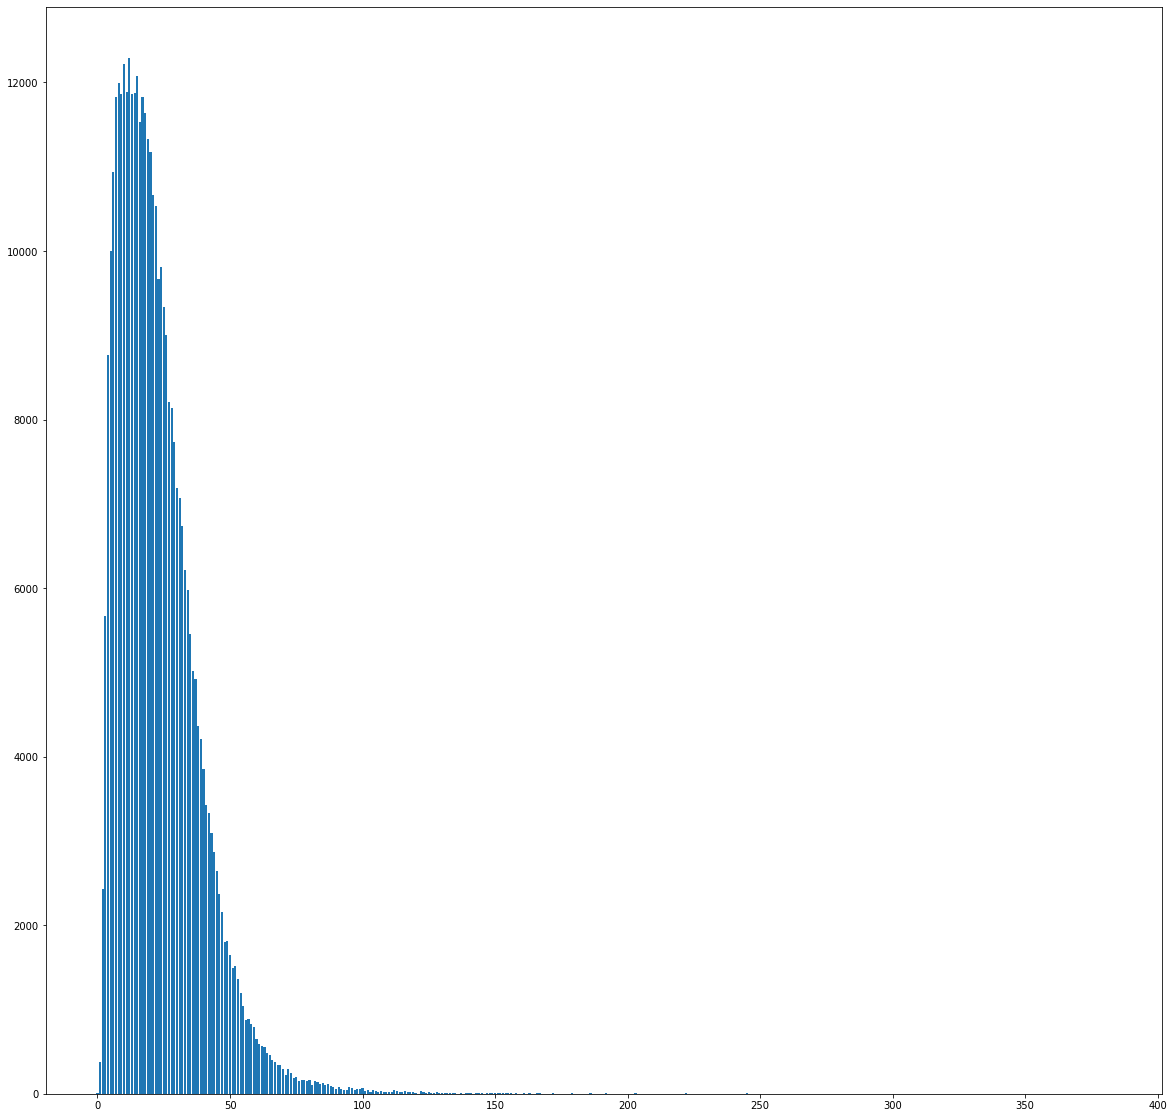

In [ ]:
value_counts=en_vi_train['norm_premise_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

max length -> 382

Visualize en-vi hypothesis length distribution


(None, 100)

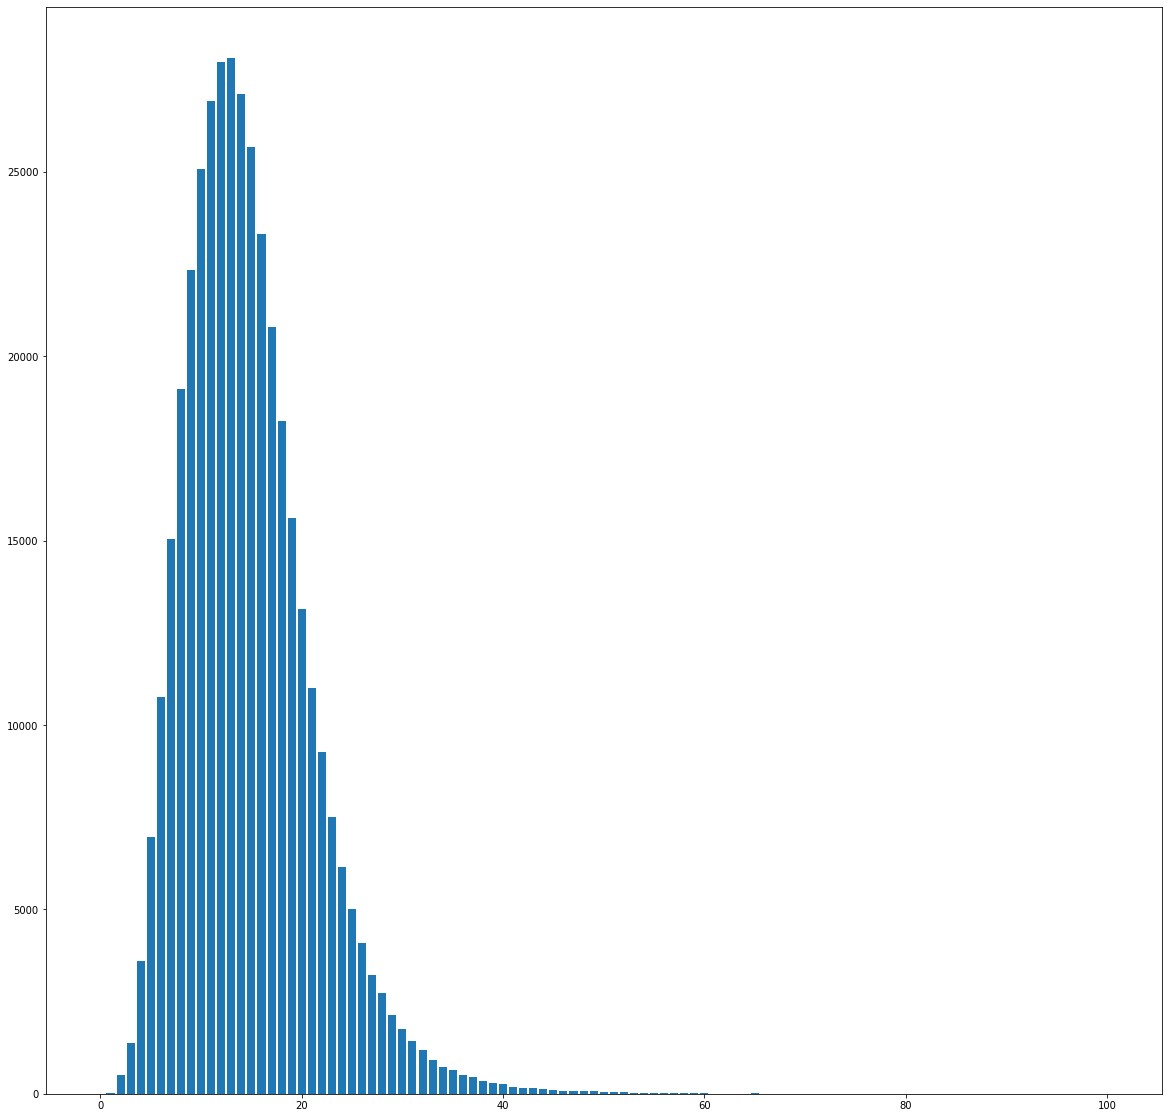

In [ ]:
value_counts=en_vi_train['norm_hypothesis_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

max length -> 100

Visualize en-vi total length distribution

(None, 401)

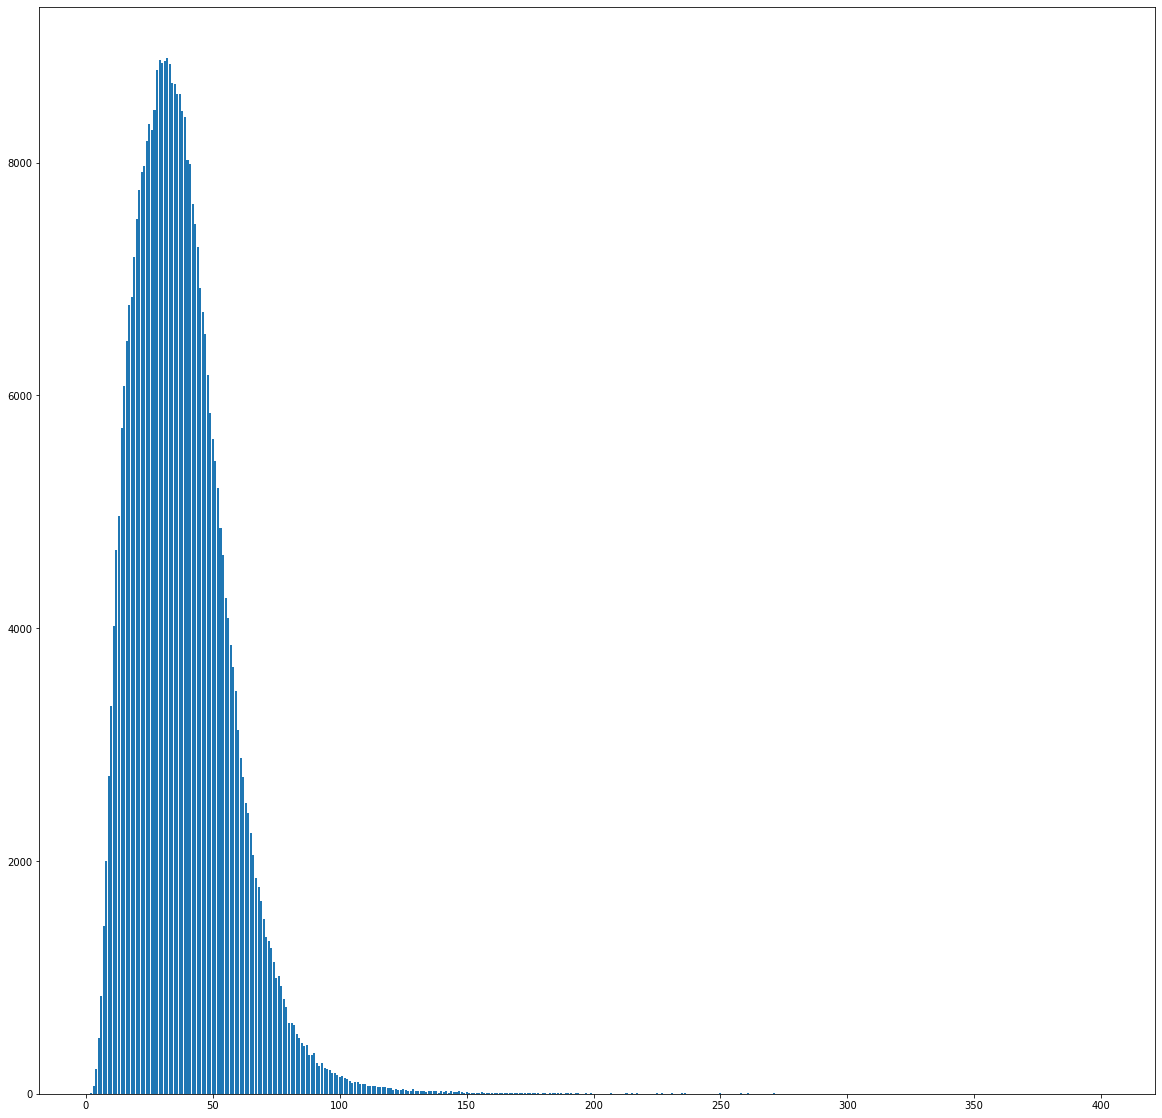

In [ ]:
value_counts=en_vi_train['total_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

max length -> 401

Visualize vi-vi premise length distribution


(None, 447)

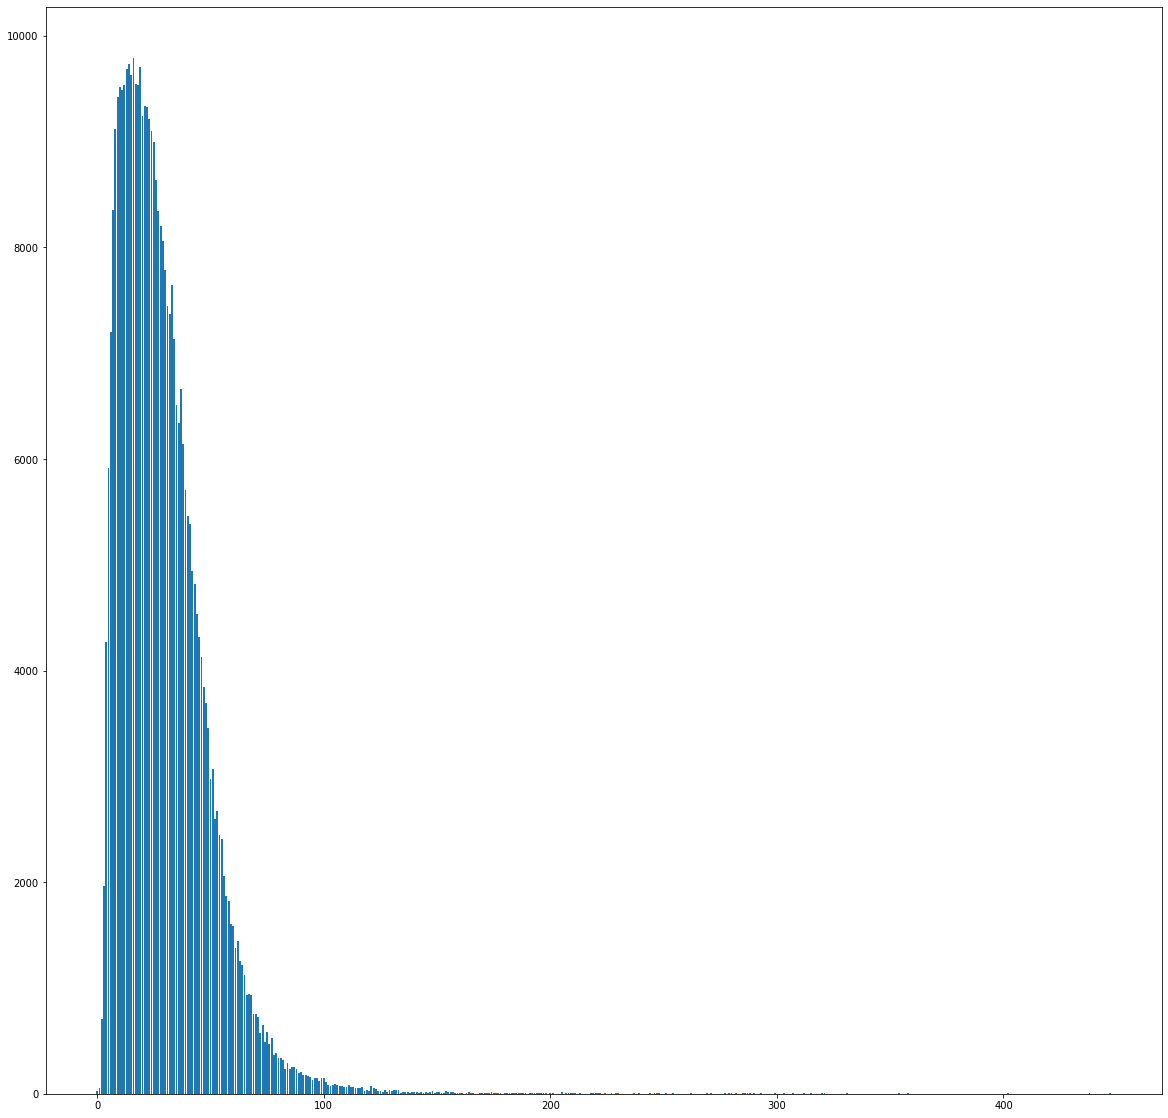

In [ ]:
value_counts=vi_vi_train['norm_premise_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

max length is 447

Visualize vi-vi hypothesis length distribution

(None, 100)

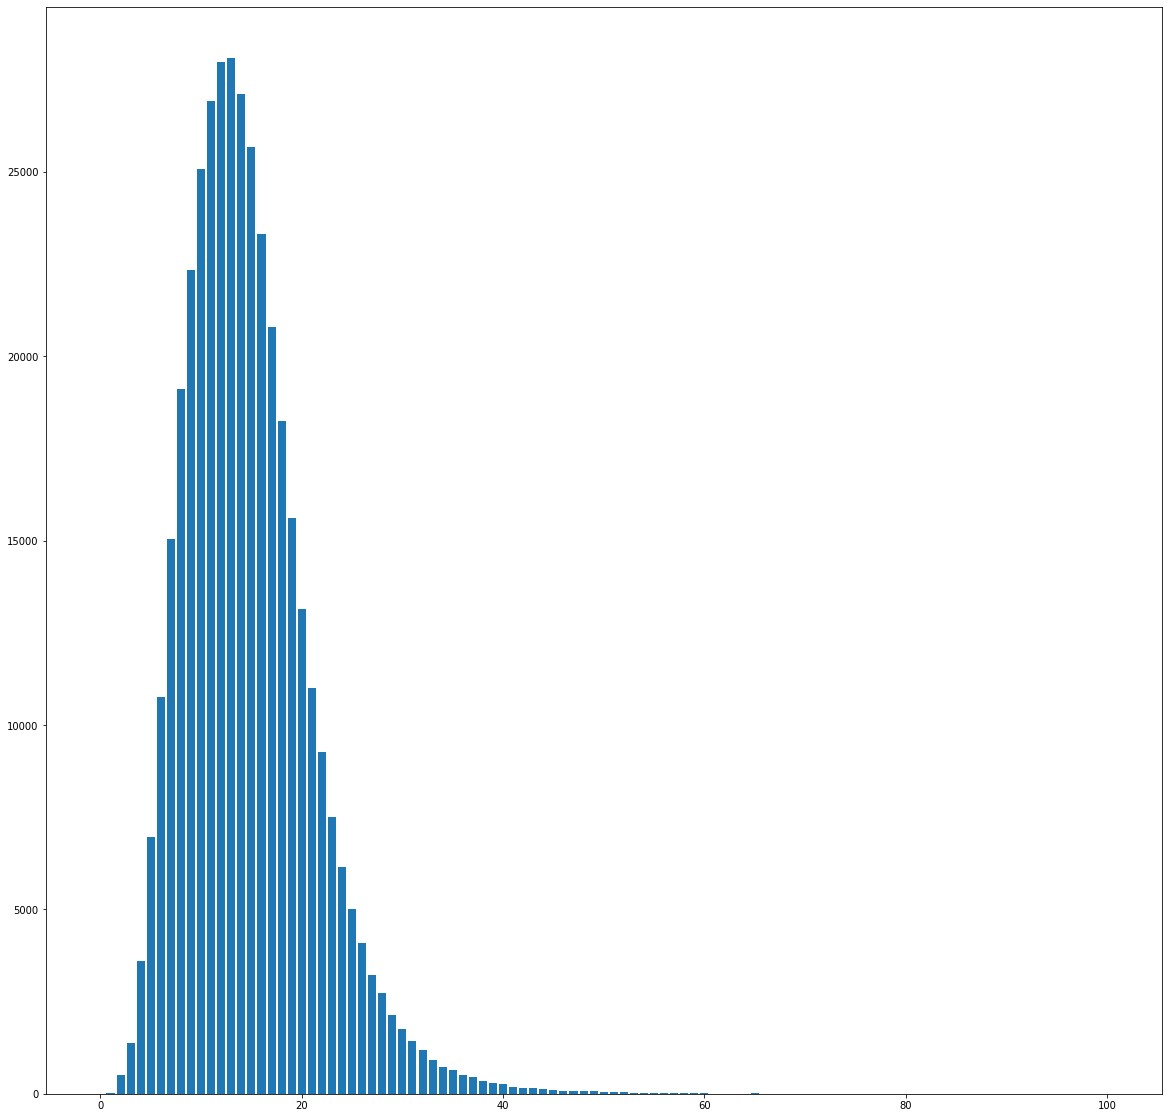

In [ ]:
value_counts=vi_vi_train['norm_hypothesis_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

max length -> 100

Visualize vi-vi total length distribution

(None, 472)

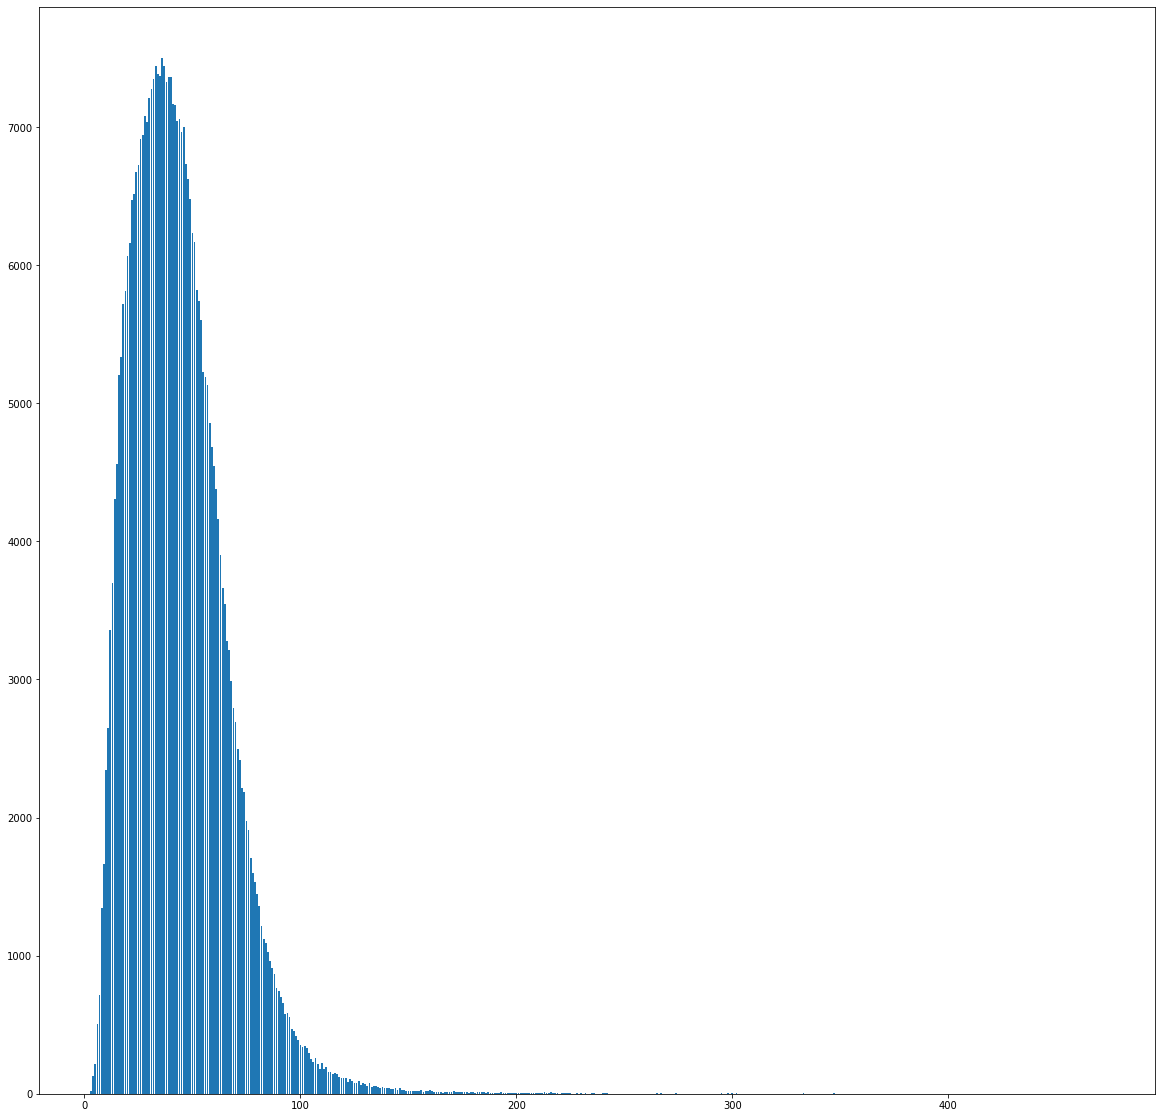

In [ ]:
value_counts=vi_vi_train['total_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

max length is 472

Note: if using all sentences en-vi and vi-vi -> max length is 256

In [ ]:
pre_dataset_directory="/content/drive/MyDrive/en-vi-nli/pre_dataset"
os.makedirs(pre_dataset_directory,exist_ok=True)

In [ ]:
os.makedirs(f'{pre_dataset_directory}/train',exist_ok=True)
en_vi_train.to_csv(f'{pre_dataset_directory}/train/en_vi.csv',index=False)
vi_vi_train.to_csv(f'{pre_dataset_directory}/train/vi_vi.csv',index=False)

because of the limitation GPU Tesla T4, I only get the sentences which have max length 60 from each set

In [ ]:
en_vi_train=en_vi_train[en_vi_train['total_length']<=60]

In [ ]:
vi_vi_train=vi_vi_train[vi_vi_train['total_length']<=60]

In [ ]:
en_vi_train.to_csv(f'{pre_dataset_directory}/train/en_vi_60.csv',index=False)
vi_vi_train.to_csv(f'{pre_dataset_directory}/train/vi_vi_60.csv',index=False)

In [ ]:
os.makedirs(f'{pre_dataset_directory}/valid',exist_ok=True)
en_vi_valid.to_csv(f'{pre_dataset_directory}/valid/en_vi.csv',index=False)
vi_vi_valid.to_csv(f'{pre_dataset_directory}/valid/vi_vi.csv',index=False)

In [ ]:
en_vi_train

,Unnamed: 0,premise,hypothesis,label,premise_language,hypothesis_language,norm_premise,norm_hypothesis,norm_premise_length,norm_hypothesis_length,total_length
0,0,Conceptually cream skimming has two basic dime...,Sản phẩm và địa lý là những gì làm cho kem ski...,1,en,vi,conceptually cream skimming has two basic dime...,sản phẩm và địa lý là những gì làm cho kem ski...,13,15,28
2,2,One of our number will carry out your instruct...,Một thành viên trong đội của tôi sẽ thực hiện ...,0,en,vi,one of our number will carry out your instruct...,một thành viên trong đội của tôi sẽ thực hiện ...,11,21,32
3,3,How do you know ? All this is their informatio...,Thông tin này thuộc về họ .,0,en,vi,how do you know all this their information again,thông tin này thuộc về họ,9,6,15
4,4,yeah i tell you what though if you go price so...,Đôi giày tennis có một tầm giá .,1,en,vi,i tell you what though if you go price some of...,đôi giày tennis có một tầm giá,29,7,36
5,5,my walkman broke so i 'm upset now i just have...,Tôi đang buồn vì cái walkman của tôi bị gãy và...,0,en,vi,my walkman broke so i am upset now i just have...,tôi đang buồn vì cái walkman của tôi bị gãy và...,21,23,44
...,...,...,...,...,...,...,...,...,...,...,...
392696,392696,"Legacy , predicting that he will keep custody ...",Con của ông ấy yêu cha của họ và đó là một điề...,1,en,vi,legacy predicting that he will keep custody of...,con của ông ấy yêu cha của họ và đó là một điề...,22,20,42
392697,392697,"Clearly , California can - and must - do better .",California không thể làm được gì tốt hơn .,2,en,vi,clearly california can and must do better,california không thể làm được gì tốt hơn,9,10,19
392698,392698,It was once regarded as the most beautiful str...,Rất nhiều các tòa nhà gốc đã được thay thế bởi...,1,en,vi,it was once regarded as most beautiful street ...,rất nhiều các tòa nhà gốc đã được thay thế bởi...,30,16,46
392699,392699,Houseboats are a beautifully preserved traditi...,Truyền thống của houseboats có nguồn gốc trong...,0,en,vi,houseboats are beautifully preserved tradition...,truyền thống của houseboats có nguồn gốc trong...,17,18,35


#Create pre-dataset with 50k en-vi samples and 50k vi-vi samples

Although I only get sentences having max length is 60, the system still cant handle them -> I decide to get random 50k sentences from each train set

In [ ]:
import pandas as pd

In [ ]:
pre_dataset_directory="/content/drive/MyDrive/en-vi-nli/pre_dataset"

In [ ]:
en_vi_train=pd.read_csv(f'{pre_dataset_directory}/train/en_vi_60.csv')
vi_vi_train=pd.read_csv(f'{pre_dataset_directory}/train/vi_vi_60.csv')

In [ ]:
en_vi_valid=pd.read_csv(f'{pre_dataset_directory}/valid/en_vi_60.csv')
vi_vi_valid=pd.read_csv(f'{pre_dataset_directory}/valid/vi_vi_60.csv')

In [ ]:
en_vi_train=en_vi_train[(en_vi_train['norm_premise_length']!=0)&(en_vi_train['norm_hypothesis_length']!=0)]

In [ ]:
vi_vi_train=vi_vi_train[(vi_vi_train['norm_premise_length']!=0)&(vi_vi_train['norm_hypothesis_length']!=0)]

In [ ]:
en_vi_train=en_vi_train.sample(n=50000)
vi_vi_train=vi_vi_train.sample(n=50000)

In [ ]:
train=pd.concat([en_vi_train,vi_vi_train],axis=0)

In [ ]:
train.value_counts(['label'])

label
2        33638
1        33260
0        33102
dtype: int64

In [ ]:
train.to_csv(f'{pre_dataset_directory}/train/train_60_100k.csv',index=False)

In [ ]:
valid=pd.concat([en_vi_valid,vi_vi_valid],axis=0)

In [ ]:
valid.to_csv(f'{pre_dataset_directory}/valid/valid.csv',index=False)

# Create inputs for BERT

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoConfig,get_linear_schedule_with_warmup,RobertaModel,RobertaPreTrainedModel
from torch.utils.data import DataLoader, Dataset
import torch
import numpy as np
from os.path import join
from tqdm.auto import tqdm
import os
from os.path import join
from torch import nn
from torch.nn import CrossEntropyLoss
from transformers.modeling_outputs import SequenceClassifierOutput

In [ ]:
pre_dataset_directory="/content/drive/MyDrive/en-vi-nli/pre_dataset"

In [ ]:
train=pd.read_csv(f'{pre_dataset_directory}/train/train_60_100k.csv')
valid=pd.read_csv(f'{pre_dataset_directory}/valid/valid.csv')

In [ ]:
name='xlm-roberta-base'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
len(train),len(valid)

(100000, 4980)

In [ ]:
class ClassificationDataset(Dataset):
    def __init__(self, input_ids, attention_mask,labels,device,token_type_ids=None):
        self.labels = labels
        self.input_ids=input_ids
        self.attention_mask=attention_mask
        self.token_type_ids=token_type_ids
        self.device=device
        
    def __len__(self):
            return len(self.labels)

    def __getitem__(self, idx):
        label = self.labels[idx]
        input_ids = self.input_ids[idx]
        attention_mask = self.attention_mask[idx]
        sample = {"inputs":{"input_ids": input_ids.to(self.device),'attention_mask':attention_mask.to(self.device)}, "labels": label.to(self.device)}
        if self.token_type_ids!=None:
          sample['inputs'].update({'token_type_ids':self.token_type_ids[idx].to(self.device)})
        return sample

In [ ]:
def create_input(tokenizer,token_ids_0,token_ids_1=None,max_length=512,padding=True):
  num_tokens_0=len(token_ids_0)
  num_tokens_1=len(token_ids_1)
  
  threshold_num_tokens_0=max_length-4-num_tokens_1
  if threshold_num_tokens_0<0:
    return None
  trade_off=abs(threshold_num_tokens_0-num_tokens_0)
  if num_tokens_0>threshold_num_tokens_0:
    
    head_token_ids_0=token_ids_0[:threshold_num_tokens_0]
    tail_token_ids_0=token_ids_0[-threshold_num_tokens_0:]

    head_input_ids=tokenizer.build_inputs_with_special_tokens(head_token_ids_0,token_ids_1)
    head_attention_mask=[1]*len(head_input_ids)

    tail_input_ids=tokenizer.build_inputs_with_special_tokens(tail_token_ids_0,token_ids_1)
    tail_attention_mask=[1]*len(tail_input_ids)
    
    input_ids=[head_input_ids,tail_input_ids]

    attention_mask=[head_attention_mask,tail_attention_mask]
  else:
    input_ids=tokenizer.build_inputs_with_special_tokens(token_ids_0,token_ids_1)
    attention_mask=[1]*len(input_ids)
    if padding==True:
      input_ids=input_ids+[1]*trade_off
      attention_mask=attention_mask+[0]*trade_off
    input_ids=[input_ids]
    attention_mask=[attention_mask]
  return input_ids,attention_mask

In [ ]:
def create_inputs(tokenizer,list_sentences_0,list_sentences_1,list_labels,max_length=512):
  
  input_ids=[]
  labels=[]
  bar=tqdm(list_sentences_0)
  attention_mask=[]
  num_training_samples=len(list_sentences_0)
  for i in range(num_training_samples):
    token_ids_0=tokenizer.encode(list_sentences_0[i],add_special_tokens=False)
    token_ids_1=tokenizer.encode(list_sentences_1[i],add_special_tokens=False)
    _input_ids,_attention_mask=create_input(tokenizer,token_ids_0,token_ids_1,max_length)
    
    _labels=[list_labels[i]]*len(_input_ids)
    labels+=_labels
    input_ids+=_input_ids
    attention_mask+=_attention_mask
    bar.update()  
  return {
    'input_ids':torch.Tensor(input_ids).to(torch.long),
    'attention_mask':torch.Tensor(attention_mask).to(torch.int),
    'labels':torch.Tensor(labels).to(torch.long)
}

In [ ]:
max_length=60


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(name)

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

In [ ]:
def create_dataloader(tokenizer,list_sentences_0,list_sentences_1,list_labels,max_length=512,batch_size=32,drop_last=False,shuffle=True,device='cpu'):
  dataloader=create_inputs(tokenizer,list_sentences_0,list_sentences_1,list_labels,max_length)

  dataloader=ClassificationDataset(**dataloader,device=device)
  dataloader=DataLoader(dataloader,batch_size=batch_size,drop_last=drop_last,shuffle=shuffle)
  return dataloader

In [ ]:
train_batch_size=32
train_premises=train['norm_premise'].tolist()
train_hypothesises=train['norm_hypothesis'].tolist()
train_labels=train['label'].tolist()

In [ ]:
train_dataloader=create_dataloader(tokenizer,train_premises,train_hypothesises,train_labels,max_length,train_batch_size,device=device,shuffle=False)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [ ]:
valid_batch_size=32
valid_premises=valid['norm_premise'].tolist()
valid_hypothesises=valid['norm_hypothesis'].tolist()
valid_labels=valid['label'].tolist()

In [ ]:
valid_dataloader=create_dataloader(tokenizer,valid_premises,valid_hypothesises,valid_labels,max_length,valid_batch_size,device=device,shuffle=False)

  0%|          | 0/4980 [00:00<?, ?it/s]

In [ ]:
labels=[0,1,2]
labels

[0, 1, 2]

#Trainer

Currently, I'm not using schedulers 

In [ ]:
epochs=4
num_training_steps=epochs *len(train_dataloader)
num_warmup_steps=100
init_lr=1e-5
eps =1e-8

In [ ]:
num_labels=len(labels)
num_labels

3

In [ ]:
classifier_dropout=0.1

In [ ]:
config=AutoConfig.from_pretrained(name)
config.classifier_dropout=classifier_dropout
config.num_labels=num_labels
config

XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": 0.1,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

In [ ]:
model_directory='/content/drive/MyDrive/en-vi-nli/models'
os.makedirs(model_directory,exist_ok=True)

In [ ]:
config.save_pretrained(model_directory)

In [ ]:
config.num_labels

3

##Aproach 1: Fine-tuning last layer BERT

In [ ]:
class XLMRoBERTa4LastLayersForClassification(RobertaPreTrainedModel):
    _keys_to_ignore_on_load_missing = [r"position_ids"]

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.config = config
        self.hidden_size=config.hidden_size
        self.roberta = RobertaModel(config, add_pooling_layer=False)

        self.dense = nn.Linear(self.config.hidden_size, self.config.hidden_size)
        
        self.dropout = nn.Dropout(self.config.classifier_dropout)
        self.out_proj = nn.Linear(self.config.hidden_size, self.config.num_labels)


        # Initialize weights and apply final processing
        self.post_init()

    
    def forward(self,input_ids,attention_mask,labels=None):

        outputs = self.roberta(input_ids=input_ids,attention_mask=attention_mask,output_hidden_states=False)
        
        cls_embedding=outputs[0][:,0,:]
        
        x = self.dropout(cls_embedding)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        logits = self.out_proj(x)

        loss=0
        if labels!=None:
          loss_fct = CrossEntropyLoss()
          loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))

        return SequenceClassifierOutput(
                loss=loss,
                logits=logits)

##Approach 2: Fine-tuning 4 last concatenating layers of BERT


In [ ]:
class XLMRoBERTa4LastLayersForClassification(RobertaPreTrainedModel):
    _keys_to_ignore_on_load_missing = [r"position_ids"]

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.config = config
        self.hidden_size=config.hidden_size
        self.roberta = RobertaModel(config, add_pooling_layer=False)

        self.dense = nn.Linear(self.config.hidden_size*4, self.config.hidden_size*4)
        
        self.dropout = nn.Dropout(self.config.classifier_dropout)
        self.out_proj = nn.Linear(self.config.hidden_size*4, self.config.num_labels)


        # Initialize weights and apply final processing
        self.post_init()

    
    def forward(self,input_ids,attention_mask,labels=None):

        outputs = self.roberta(input_ids=input_ids,attention_mask=attention_mask,output_hidden_states=True)
        last_layers=torch.stack(outputs.hidden_states[-4:])
        last_layers=last_layers.permute(1,2,0,3)
        features=torch.flatten(last_layers,start_dim=2)
        cls_embedding=features[:,0,:]
        
        x = self.dropout(cls_embedding)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        logits = self.out_proj(x)

        loss=0
        if labels!=None:
          loss_fct = CrossEntropyLoss()
          loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))

        return SequenceClassifierOutput(
                loss=loss,
                logits=logits)

##Approach 3: Fine-tuning 4 last concatenating layers of BERT + mean-max pooling

In [ ]:
from transformers import RobertaModel,RobertaPreTrainedModel
from transformers.models.roberta.modeling_roberta import RobertaClassificationHead
class XLMRoBERTa4LastLayersForClassification(RobertaPreTrainedModel):
    _keys_to_ignore_on_load_missing = [r"position_ids"]

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.config = config
        # self.hidden_size=config.hidden_size
        self.roberta = RobertaModel(self.config, add_pooling_layer=False)

        self.bilstm_layer=torch.nn.LSTM(input_size=self.config.hidden_size*4,hidden_size=self.config.hidden_size,bidirectional=True,batch_first=True)        

        ## classifier head
        self.dense = nn.Linear(self.config.hidden_size*4, self.config.hidden_size*4)
        
        self.dropout = nn.Dropout(self.config.classifier_dropout)
        self.out_proj = nn.Linear(self.config.hidden_size*4, self.config.num_labels)

        # Initialize weights and apply final processing
        self.post_init()

    def init_hidden(self,batch_size):
        return (torch.randn(2, batch_size, self.config.hidden_size ).to(device),
                torch.randn(2, batch_size, self.config.hidden_size ).to(device))

    
    def forward(self,input_ids,attention_mask,labels=None):

        bs=input_ids.shape[0]

        outputs = self.roberta(input_ids=input_ids,attention_mask=attention_mask,output_hidden_states=True)
        last_layers=torch.stack(outputs.hidden_states[-4:])
        last_layers=last_layers.permute(1,2,0,3)
        features=torch.flatten(last_layers,start_dim=2)
        cls_embedding=features[:,0,:]

        hidden = self.init_hidden(bs)
    
        _features,hidden=self.bilstm_layer(features,hidden)
        avg_pool = torch.mean(_features, 1)
        max_pool, _ = torch.max(_features, 1)
        concat = torch.cat(( avg_pool, max_pool), 1)

        cls_embedding=cls_embedding+concat

        # sequence_output = features
        x = self.dropout(cls_embedding)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        logits = self.out_proj(x)

        loss=0
        if labels!=None:
          loss_fct = CrossEntropyLoss()
          loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))

        return SequenceClassifierOutput(
                loss=loss,
                logits=logits)
      

##Train

In [ ]:
model=XLMRoBERTa4LastLayersForClassification.from_pretrained(name,config=config).to(device)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRoBERTa4LastLayersForClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRoBERTa4LastLayersForClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRoBERTa4LastLayersForClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRoBERTa4LastLayersForClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['out_

In [ ]:
optimizer=torch.optim.AdamW(model.parameters(),lr=init_lr,weight_decay =0.01,eps=eps)

In [ ]:
lr_scheduler=get_linear_schedule_with_warmup(optimizer,num_warmup_steps=num_warmup_steps,num_training_steps=num_training_steps,)

In [ ]:
def save_model(epoch,model,optimizer,scheduler,training_loss,valid_loss,train_acc,valid_acc,path,step=None):
  torch.save({
          'epoch': epoch,
          'model_state_dict': model,
          'optimizer_state_dict': optimizer,
          'scheduler_state_dict': scheduler,
          'training_loss': training_loss,
          'valid_loss': valid_loss,
          'train_acc': train_acc,
          'valid_acc': valid_acc,
          'step':step
          }, join(path,f'ckpt{epoch}.pt'))

In [ ]:
from sklearn.metrics import *

In [ ]:
def run_train(optimizer,dataloader,lr_scheduler=None):
  model.train(True)
  loop = tqdm(dataloader)
  loss=0
  true=[]
  pred=[]
  for batch in dataloader:
    optimizer.zero_grad()
    inputs=batch['inputs']
    inputs.update({"labels":batch['labels']})
    true+=batch['labels'].tolist()
    outputs=model(**inputs)
    outputs.loss.backward()

    loss+=outputs.loss.item()
    probs=torch.nn.functional.softmax(outputs.logits,dim=-1)
    _pred=torch.argmax(probs,dim=-1).tolist()
    pred+=_pred
    optimizer.step()
    # if lr_scheduler!=None:
    lr_scheduler.step()
    loop.set_postfix({f'train_loss_per_batch':outputs.loss.item()})
    loop.update()      
  acc=accuracy_score(true,pred)
  return loss/len(dataloader),acc

In [ ]:
def run_valid(dataloader):
  model.eval()
  loss=0
  pred=[]
  true=[]
  with torch.no_grad():
    for batch in dataloader:
      inputs=batch['inputs']
      inputs.update({"labels":batch['labels']})
      true+=batch['labels'].tolist()
      
      outputs=model(**inputs)
      probs=torch.nn.functional.softmax(outputs.logits,dim=-1)
      _pred=torch.argmax(probs,dim=-1).tolist()
      pred+=_pred
      loss+=outputs.loss.item()

  acc=accuracy_score(true,pred)

  return loss/len(dataloader),acc

In [ ]:
import gc
gc.collect()

821

In [ ]:
lr_scheduler

In [ ]:
model_directory='/content/drive/MyDrive/en-vi-nli/models/last-layer'
os.makedirs(model_directory,exist_ok=True)
model_directory

'/content/drive/MyDrive/en-vi-nli/models/last-layer'

In [ ]:
train_loss_per_step=[]
valid_loss_per_step=[]
train_acc_per_step=[]
valid_acc_per_step=[]
# min_loss=np.inf
best_acc=0
count_stopping=0
for epoch in range(epochs):

  train_loss,train_acc=run_train(optimizer,train_dataloader,lr_scheduler)
  
  valid_loss,valid_acc=run_valid(valid_dataloader)

  train_loss_per_step.append(train_loss)
  valid_loss_per_step.append(valid_loss)

  train_acc_per_step.append(train_acc)
  valid_acc_per_step.append(valid_acc)
  
  print(f'epoch: {epoch} train_loss: {train_loss} valid_loss: {valid_loss} train_acc: {train_acc} valid_acc: {valid_acc}')
  # if valid_loss<min_loss:
  if best_acc<valid_acc:
    # min_loss=valid_loss
    best_acc=valid_acc
    save_model(epoch,model.state_dict(),optimizer.state_dict(),lr_scheduler.state_dict(),train_loss,valid_loss,train_acc,valid_acc,model_directory)
    count_stopping=0
  else:
    count_stopping+=1
  
  if count_stopping>5:
    break


try Siamese bert

#Inference

In [ ]:
import pandas as pd
en_vi_test=pd.read_csv('/content/drive/MyDrive/en-vi-nli/pairs_dataset/test/en_vi.csv')
vi_vi_test=pd.read_csv('/content/drive/MyDrive/en-vi-nli/pairs_dataset/test/vi_vi.csv')

In [ ]:
test=pd.concat([en_vi_test,vi_vi_test],axis=0)
test

,Unnamed: 0,premise,hypothesis,label,premise_language,hypothesis_language
0,0,"Well, I wasn't even thinking about that, but I...",Tôi đã không nói chuyện với anh ta nữa.,2,en,vi
1,1,"Well, I wasn't even thinking about that, but I...",Tôi buồn tới mức tôi lại bắt đầu nói chuyện lạ...,0,en,vi
2,2,"Well, I wasn't even thinking about that, but I...",Chúng tôi có buổi nói chuyện tuyệt vời.,1,en,vi
3,3,"And I thought that was a privilege, and it's s...",Tôi không nhận ra rằng tôi không phải là người...,1,en,vi
4,4,"And I thought that was a privilege, and it's s...",Tôi có ấn tượng là tôi là người duy nhất có số...,0,en,vi
...,...,...,...,...,...,...
5005,5005,Davidson không nên áp dụng cách phát âm chữ sc...,Davidson không nên nói theo cách mà xương và â...,0,vi,vi
5006,5006,Davidson không nên áp dụng cách phát âm chữ sc...,Sẽ tốt hơn nếu Davidson vần các từ và xương.,2,vi,vi
5007,5007,Tiểu thuyết trung bình có 200.000 từ giá khoản...,Một cuốn tiểu thuyết 200.000 từ với giá 25 đô ...,1,vi,vi
5008,5008,Tiểu thuyết trung bình có 200.000 từ giá khoản...,Một cuốn tiểu thuyết 200.000 từ với giá 25 USD...,2,vi,vi


In [ ]:
config = AutoConfig.from_pretrained('/content/drive/MyDrive/en-vi-nli/models')
config._name_or_path=name

In [ ]:
config


In [ ]:
model=XLMRoBERTa4LastLayersForClassification(config=config).to(device)

In [ ]:
checkpoint = torch.load("/content/drive/MyDrive/en-vi-nli/models/last-layer/ckpt2.pt",map_location=device)

In [ ]:
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [ ]:
en_vi_y_true=en_vi_test['label'].tolist()
vi_vi_y_true=vi_vi_test['label'].tolist()

In [ ]:
max_length=60

In [ ]:
def predict(premises,hypothesises,max_length,return_tensors='pt',device='cpu',normalizer=None):
  #premises: list of texts
  #hypothesises: list of texts
  #normalizer: function -> clean dataset and return a new input with the same format
  model.eval()
  y_pred=[]
  with torch.no_grad():
    loop = tqdm(range(len(premises)))
    for idx,sample in enumerate(zip(premises,hypothesises)):
      if normalizer!=None:
        premise=normalizer(sample[0])
        hypothesis=normalizer(sample[1])
      token_ids_0=tokenizer.encode(premise,add_special_tokens=False)
      token_ids_1=tokenizer.encode(hypothesis,add_special_tokens=False)
      input_ids,attention_mask=create_input(tokenizer,token_ids_0,token_ids_1,max_length=max_length,padding=False)
      input_ids=torch.Tensor(input_ids).to(torch.long).to(device)
      attention_mask=torch.Tensor(attention_mask).to(torch.int).to(device)
      _inputs={
          'input_ids':input_ids,
          'attention_mask':attention_mask
      }
      outputs=model(**_inputs)

      logits=torch.sum(outputs.logits,dim=0,keepdim=True)

      probs=torch.nn.functional.softmax(logits,dim=-1)
      preds=torch.argmax(probs,dim=-1)
      y_pred.append(preds)
      loop.update()
  return torch.Tensor(y_pred)

In [ ]:
en_vi_y_pred=predict(en_vi_test['premise'].tolist(),en_vi_test['hypothesis'].tolist(),max_length,device=device,normalizer=normalizer)

  0%|          | 0/5010 [00:00<?, ?it/s]

In [ ]:
en_vi_y_pred=en_vi_y_pred.tolist()

In [ ]:
from sklearn.metrics import *

In [ ]:
#1
print(classification_report(en_vi_y_true,en_vi_y_pred,digits=5))

In [ ]:
vi_vi_y_pred=predict(vi_vi_test['premise'].tolist(),vi_vi_test['hypothesis'].tolist(),max_length,device=device,normalizer=normalizer)

  0%|          | 0/5010 [00:00<?, ?it/s]

In [ ]:
vi_vi_y_pred=vi_vi_y_pred.tolist()

In [ ]:
#1
print(classification_report(vi_vi_y_true,vi_vi_y_pred,digits=5))